In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams

import seaborn as sb

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = (16, 7)
plt.style.use('fivethirtyeight')

In [3]:
address = 'sample-salesv3.xlsx'
df = pd.read_excel(address)
df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


In [4]:
df.shape

(1500, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
account number    1500 non-null int64
name              1500 non-null object
sku               1500 non-null object
quantity          1500 non-null int64
unit price        1500 non-null float64
ext price         1500 non-null float64
date              1500 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 82.1+ KB


In [6]:
df.columns = df.columns.str.replace(' ', '_')

In [7]:
df.head()

,account_number,name,sku,quantity,unit_price,ext_price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


In [8]:
type(df['date'][0])

str

###### Converting date column to Timestamp 

In [9]:
df['date'] = pd.to_datetime(df.date)

In [10]:
type(df['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

###### Finding the data From 01/06/2014

In [11]:
ts = pd.to_datetime('1-06-2014')

In [12]:
df.loc[df.date >= ts, :]

,account_number,name,sku,quantity,unit_price,ext_price,date
20,424914,White-Trantow,S2-00301,45,96.95,4362.75,2014-01-06 08:20:27
21,527099,Sanford and Sons,S1-30248,24,50.29,1206.96,2014-01-06 14:14:00
22,786968,"Frami, Hills and Schmidt",B1-04202,2,52.41,104.82,2014-01-06 15:53:49
23,714466,Trantow-Barrows,S1-30248,-1,16.97,-16.97,2014-01-06 18:27:28
24,786968,"Frami, Hills and Schmidt",S2-83881,34,60.41,2053.94,2014-01-06 23:38:31
25,729833,Koepp Ltd,S2-78676,5,14.75,73.75,2014-01-07 00:29:41
26,737550,"Fritsch, Russel and Anderson",B1-53636,42,42.06,1766.52,2014-01-08 00:02:11
27,672390,Kuhn-Gusikowski,S2-83881,42,63.87,2682.54,2014-01-08 10:00:08
28,714466,Trantow-Barrows,B1-38851,4,60.04,240.16,2014-01-08 11:50:18
29,729833,Koepp Ltd,B1-86481,6,81.79,490.74,2014-01-08 17:46:40


###### Adding Month column and finding ext_price by monthly

In [13]:
df['months'] = df.date.dt.strftime('%B')

In [14]:
df.head()

,account_number,name,sku,quantity,unit_price,ext_price,date,months
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51,January
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47,January
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58,January
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22,January
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55,January


In [15]:
grp_month = df.groupby('months').ext_price.sum().sort_values(ascending = False)
grp_month

months
March        203921.38
July         191662.11
January      185361.66
April        174574.11
June         174089.33
October      171495.32
September    168443.17
May          165418.55
December     163867.26
August       153778.59
February     146211.62
November     119961.22
Name: ext_price, dtype: float64

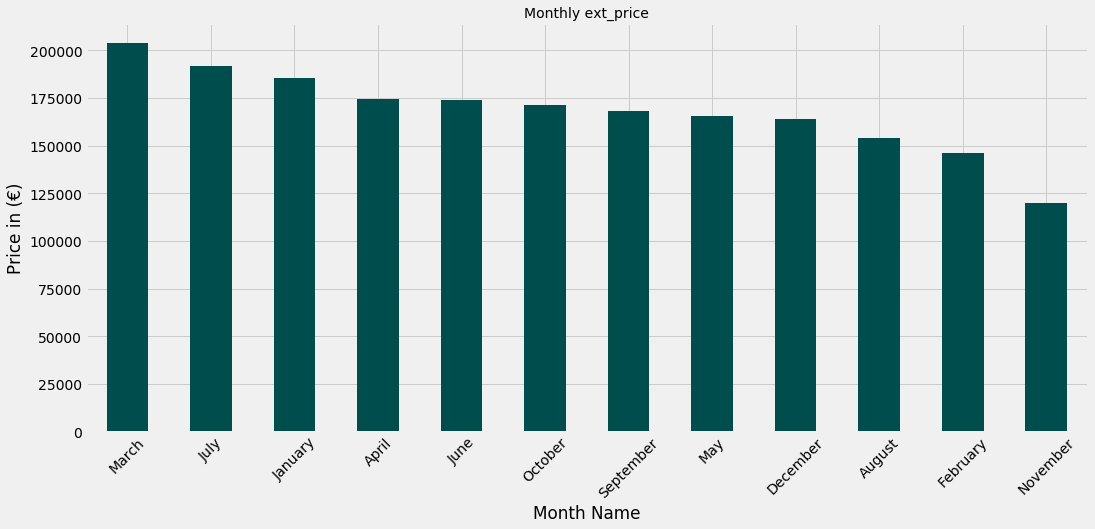

In [16]:
grp_month.plot(kind = 'bar', color = ['#004d4d'], rot = 45)
plt.title('Monthly ext_price', fontsize = 14)
plt.xlabel('Month Name')
plt.ylabel('Price in (€)')
plt.show()

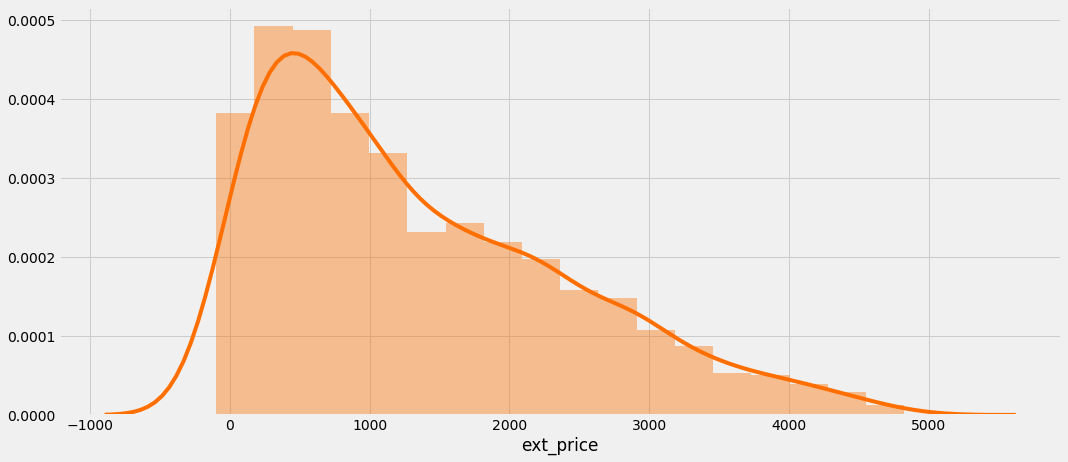

In [17]:
sb.distplot(df['ext_price'], color = '#ff6f00');

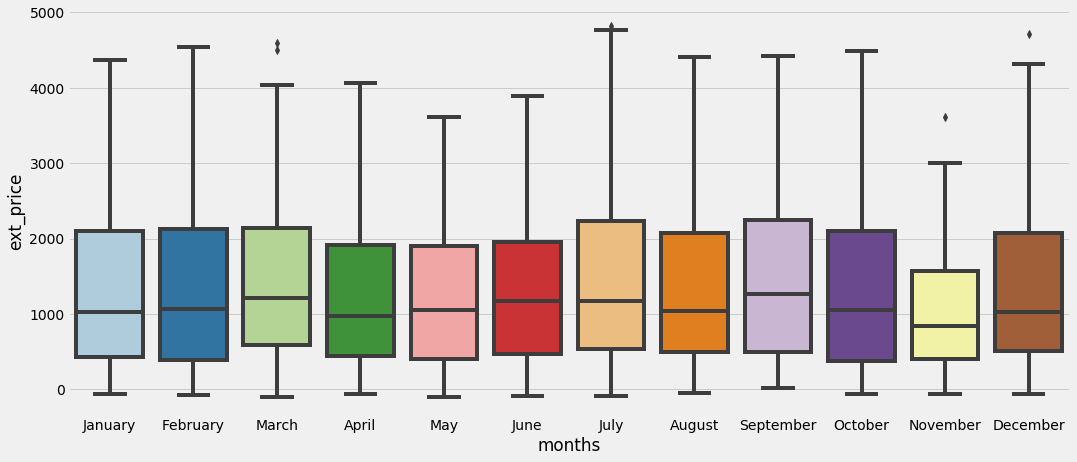

In [18]:
sb.boxplot(x = df['months'], y = df['ext_price'], data = df, palette = 'Paired');

###### Adding Day

In [23]:
df['day'] = df['date'].dt.weekday_name
df.head()

,account_number,name,sku,quantity,unit_price,ext_price,date,months,day
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51,January,Wednesday
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47,January,Wednesday
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58,January,Wednesday
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22,January,Wednesday
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55,January,Wednesday


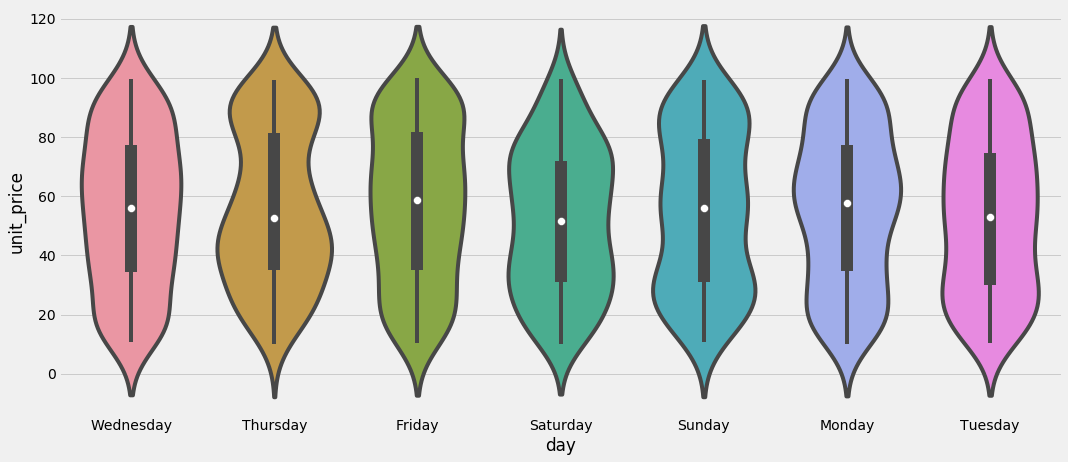

In [24]:
sb.violinplot(x = 'day', y = 'unit_price', data = df, scale = 'area');

###### relating among two data pair

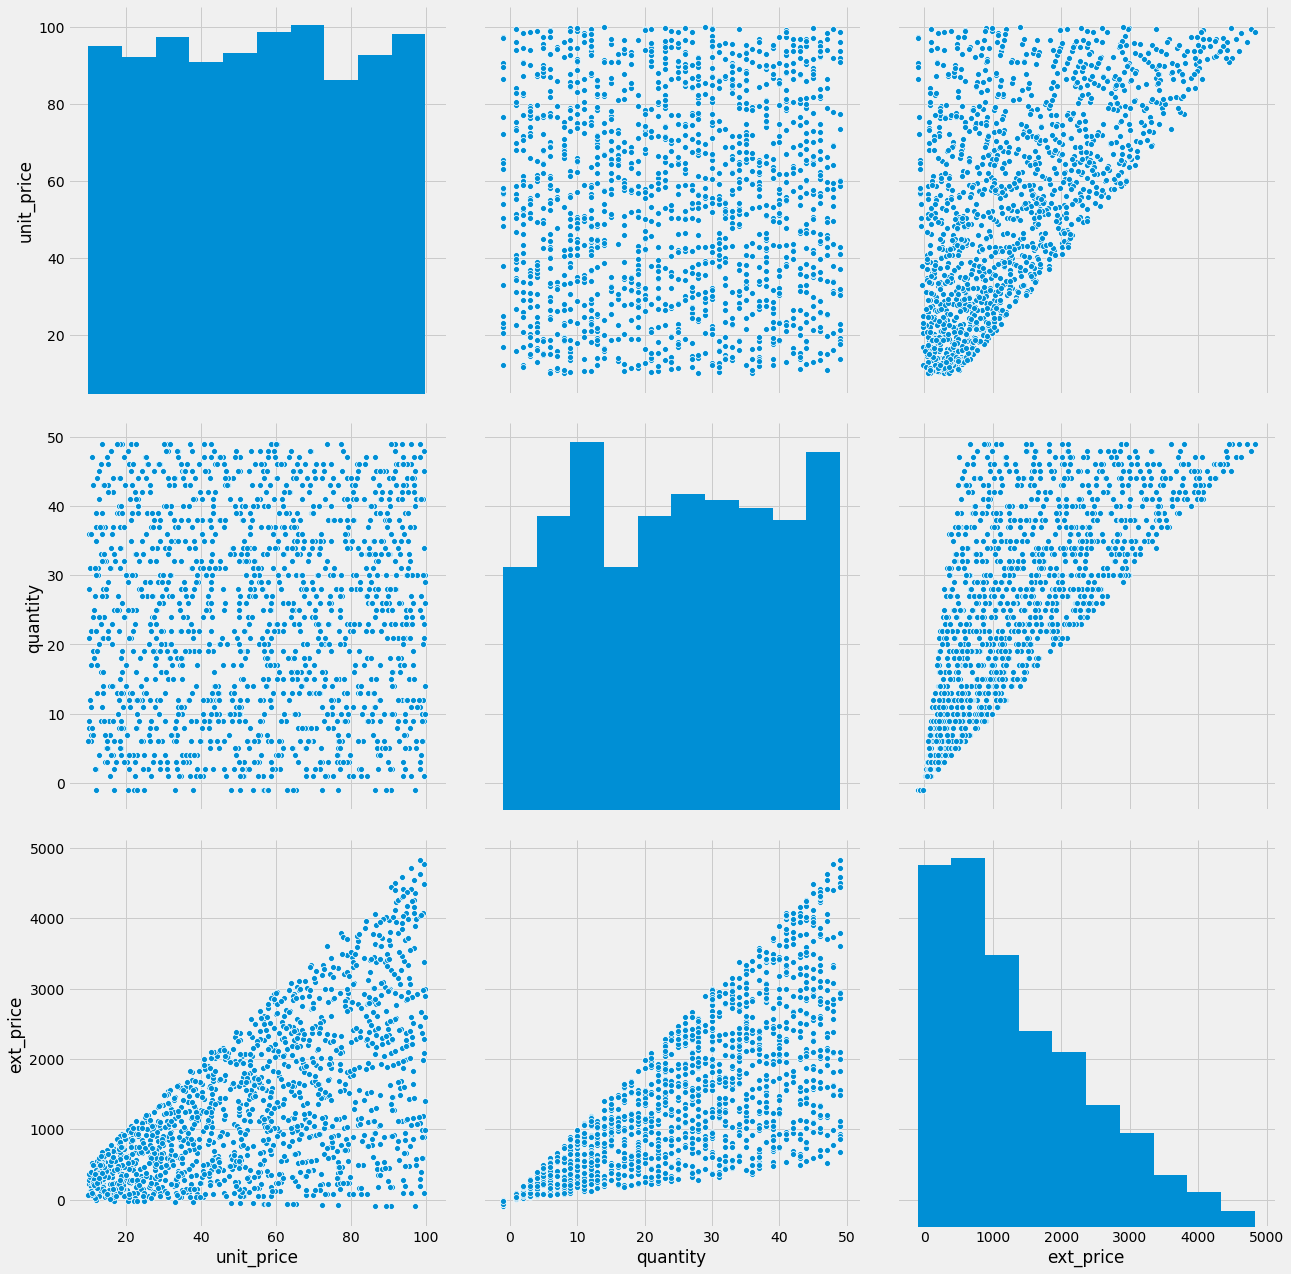

In [25]:
sb.pairplot(df[['unit_price','quantity','ext_price']], 
                  palette='tab20',size=6);

###### Monthly average ext_price

In [26]:
np.mean(df['ext_price'])

1345.8562133333335

###### summarizing all of the sales by month, we can use the resample function.  resample only operates on an index. use set_index to make the date column an index and then resample

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html

In [27]:
df.set_index('date').resample('M')['ext_price'].sum()

date
2014-01-31    185361.66
2014-02-28    146211.62
2014-03-31    203921.38
2014-04-30    174574.11
2014-05-31    165418.55
2014-06-30    174089.33
2014-07-31    191662.11
2014-08-31    153778.59
2014-09-30    168443.17
2014-10-31    171495.32
2014-11-30    119961.22
2014-12-31    163867.26
Freq: M, Name: ext_price, dtype: float64

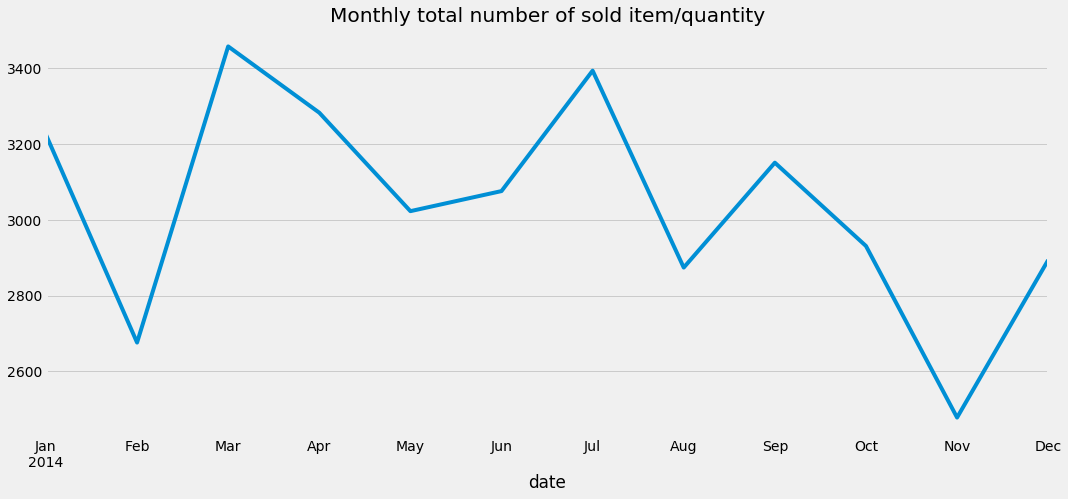

In [28]:
df.set_index('date').resample('M')['quantity'].sum().plot()
plt.title('Monthly total number of sold item/quantity')
plt.show()

###### To smmarize the data group the data to see the monthly results for each customer

In [29]:
df.set_index('date').groupby('name')['unit_price'].resample('M').mean()

name                             date      
Barton LLC                       2014-01-31    52.787500
                                 2014-02-28    65.202857
                                 2014-03-31    52.453333
                                 2014-04-30    49.400000
                                 2014-05-31    51.661250
                                 2014-06-30    51.691250
                                 2014-07-31    47.730000
                                 2014-08-31    56.796667
                                 2014-09-30    56.666250
                                 2014-10-31    51.558571
                                 2014-11-30    54.060000
                                 2014-12-31    49.733333
Cronin, Oberbrunner and Spencer  2014-01-31    23.200000
                                 2014-02-28    47.401111
                                 2014-03-31    52.157778
                                 2014-04-30    32.040000
                                 2014-05-31 

# use of grouper function
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html

In [30]:
df.groupby(['name', pd.Grouper(key = 'date', freq = 'M')])['unit_price'].mean()

name                             date      
Barton LLC                       2014-01-31    52.787500
                                 2014-02-28    65.202857
                                 2014-03-31    52.453333
                                 2014-04-30    49.400000
                                 2014-05-31    51.661250
                                 2014-06-30    51.691250
                                 2014-07-31    47.730000
                                 2014-08-31    56.796667
                                 2014-09-30    56.666250
                                 2014-10-31    51.558571
                                 2014-11-30    54.060000
                                 2014-12-31    49.733333
Cronin, Oberbrunner and Spencer  2014-01-31    23.200000
                                 2014-02-28    47.401111
                                 2014-03-31    52.157778
                                 2014-04-30    32.040000
                                 2014-05-31 

######  data summary in a different time frame can be displayed by just change the freq parameter. For an example to show the summary of September month 

In [31]:
df.groupby(['name', pd.Grouper(key = 'date', freq = 'A-Sep')])['unit_price'].sum()

name                             date      
Barton LLC                       2014-09-30    3682.71
                                 2015-09-30     726.35
Cronin, Oberbrunner and Spencer  2014-09-30    2353.12
                                 2015-09-30     983.87
Frami, Hills and Schmidt         2014-09-30    2840.31
                                 2015-09-30    1102.18
Fritsch, Russel and Anderson     2014-09-30    2984.04
                                 2015-09-30    1366.37
Halvorson, Crona and Champlin    2014-09-30    2662.66
                                 2015-09-30     582.26
Herman LLC                       2014-09-30    2648.78
                                 2015-09-30     610.37
Jerde-Hilpert                    2014-09-30    3572.10
                                 2015-09-30    1063.44
Kassulke, Ondricka and Metz      2014-09-30    2159.88
                                 2015-09-30    1106.88
Keeling LLC                      2014-09-30    3167.75
                     

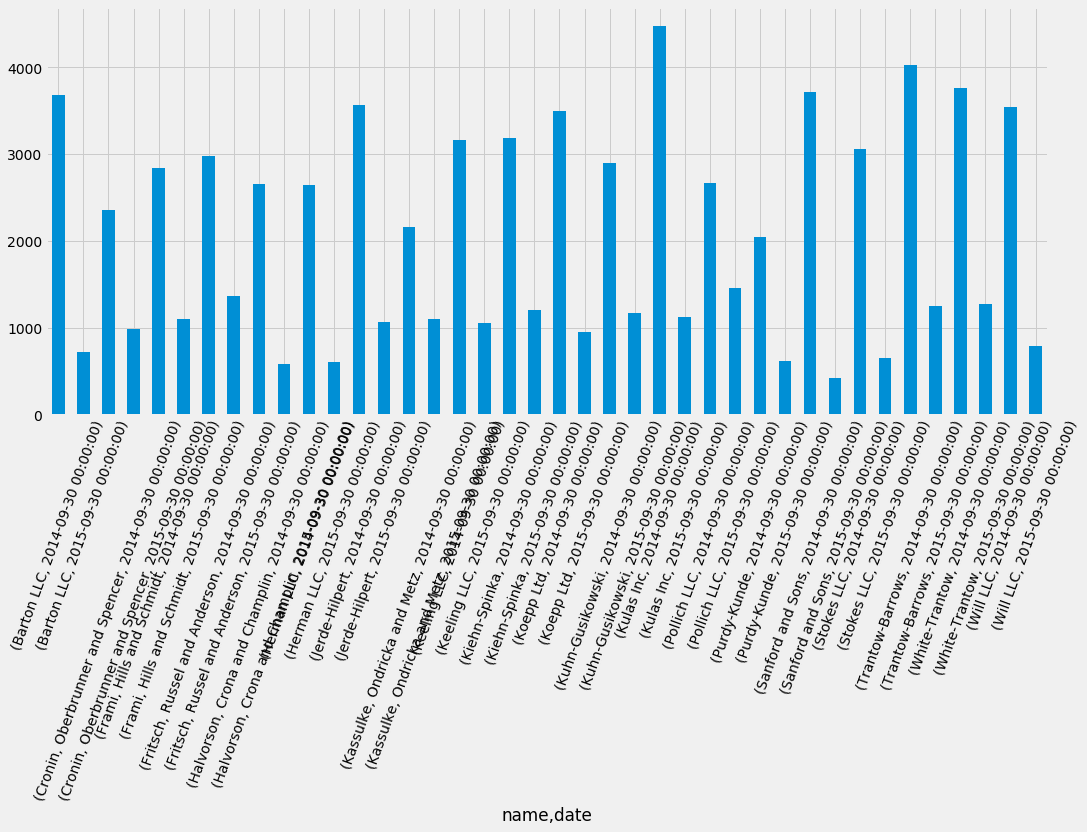

In [32]:
df.groupby(['name', pd.Grouper(key = 'date', freq = 'A-Sep')])['unit_price'].sum().plot(kind = 'bar', rot = 70)

# use of Agg Func

In [33]:
df[['ext_price', 'unit_price']].agg(['sum', 'mean'])

,ext_price,unit_price
sum,2.018784e+06,82511.290000
mean,1.345856e+03,55.007527


In [34]:
df.agg({'ext_price': ['sum', 'mean'], 'quantity': ['sum', 'mean'], 'unit_price': ['sum', 'mean']})

,ext_price,quantity,unit_price
sum,2.018784e+06,36463.000000,82511.290000
mean,1.345856e+03,24.308667,55.007527


In [35]:
get_max = lambda x: x.value_counts(dropna=False).index[0]

In [36]:
get_max.__name__ = 'most frequent'

In [37]:
df.agg({'ext_price': ['sum', 'mean'], 'quantity': ['sum', 'mean'], 'unit_price': ['sum', 'mean'], 'sku': [get_max]})

,ext_price,quantity,unit_price,sku
mean,1.345856e+03,24.308667,55.007527,NaN
most frequent,NaN,NaN,NaN,S2-77896
sum,2.018784e+06,36463.000000,82511.290000,NaN
